In [85]:
!pip install progressbar2

  Using cached https://files.pythonhosted.org/packages/4f/6f/acb2dd76f2c77527584bd3a4c2509782bb35c481c610521fc3656de5a9e0/progressbar2-3.38.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/eb/a0/19119d8b7c05be49baf6c593f11c432d571b70d805f2fe94c0585e55e4c8/python_utils-2.3.0-py2.py3-none-any.whl
You are using pip version 8.1.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import shuffle
def load_data():
    
    path = 'dataset1'
    pctr1 = os.path.join(path,'data2_class1.npy')
    pctr2 = os.path.join(path,'data2_class2.npy')
    pcte1 = os.path.join(path,'data2_test1.npy')
    pcte2 = os.path.join(path,'data2_test2.npy')
    
    train1 = np.load(pctr1)
    train2 = np.load(pctr2)
    test1 = np.load(pcte1)
    test2 = np.load(pcte2)
    
    return train1, train2, test1, test2

In [87]:
def get_predictions(x, mu, cov, pi, prior):
    sum_g = 0
    l = len(cov)
    g = x-mu[0]
    
    for i in range(l):
        sum_g+=(pi[i]*(np.linalg.det(cov[i])**-.5)*((2 * np.pi)**(-x.shape[0]/2.))* np.exp(-.5 * np.matmul((x - mu[i]),np.matmul(np.linalg.inv(cov[i]),(x- mu[i]).T))))
    
    return sum_g*prior

In [88]:
def get_confusion_mat(c1, c2, c3, classes):
    
    lis = []
    if(c3!=0):
        conf_mat = np.full((3,3),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(c3):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [89]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [90]:
def find_range(data1, data2, test1, test2):
    
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(test1[:,0]))
    minx = min(minx, np.min(test2[:,0]))
    
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(test1[:,1]))
    miny = min(miny, np.min(test2[:,1]))
   
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(test1[:,0]))
    maxx = max(maxx, np.max(test2[:,0]))
    
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(test1[:,1]))
    maxy = max(maxy, np.max(test2[:,1]))
    
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

def find_range3(data1, data2, data3, test1, test2, test3):
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))
    minx = min(minx, np.min(test1[:,0]))
    minx = min(minx, np.min(test2[:,0]))
    minx = min(minx, np.min(test3[:,0]))
    
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))
    miny = min(miny, np.min(test1[:,1]))
    miny = min(miny, np.min(test2[:,1]))
    miny = min(miny, np.min(test3[:,1]))
   
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))
    maxx = max(maxx, np.max(test1[:,0]))
    maxx = max(maxx, np.max(test2[:,0]))
    maxx = max(maxx, np.max(test3[:,0]))
    
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    maxy = max(maxy, np.max(test1[:,1]))
    maxy = max(maxy, np.max(test2[:,1]))
    maxy = max(maxy, np.max(test3[:,1]))
    
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

In [107]:
def pair_plot(test1, test2, dc1, dc2, mu1, cov1, pi1, mu2, cov2, pi2, il, jl,k):
    le1 = dc1.shape[0]
    le2 = dc2.shape[0]
    le  = le1+le2
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    minx, miny, maxx,maxy = find_range(dc1, dc2, test1, test2)
    print("*"*30)
    for i in np.arange(minx,maxx,1e-1):
        for j in np.arange(miny,maxy,1e-1):
            data=[]
            data.append([i,j])
            data=np.array(data)
            g1 = get_predictions(data, mu1, cov1, pi1, le1/le)
            g2 = get_predictions(data, mu2, cov2, pi2, le2/le)
            if(np.argmax([g1,g2])==0):
                dat_red.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2])==1):
                dat_blue.append([data[0][0],data[0][1]])
                
    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()
    print("*"*30)
    
#     x1 = []
#     y1 = []
#     for i in range(k):
#         x_temp = np.linspace(mu1[i][0]-2,mu1[i][0]+2,100)
#         y_temp = np.linspace(mu1[i][1]-2,mu1[i][1]+2,100)
#         for j in x_temp:
#             x1.append(j)
#         for j in y_temp:
#             y1.append(j)
        
#     print("*"*30)
#     n1 = 100*k  
#     Z1 = np.ndarray(shape=(n1,n1),dtype=float)
#     for i in range(n1):
#         for j in range(n1):
#             P=[]
#             P.append([x1[i],y1[j]])
#             P=np.array(data)
#             g = get_predictions(P,mu1,cov1, pi1, le1/le)
#             Z1[j][i]=g[0][0]
#     X1, Y1 = np.meshgrid(x1,y1)
#     print("*"*30)
#     x2 = []
#     y2 = []
#     for i in range(k):
#         x_temp = np.linspace(mu2[i][0]-2,mu2[i][0]+2,100)
#         y_temp = np.linspace(mu2[i][1]-2,mu2[i][1]+2,100)
#         for j in x_temp:
#             x2.append(j)
#         for j in y_temp:
#             y2.append(j)
#     print("*"*30)    
#     n2 = 100*k  
#     Z2 = np.ndarray(shape=(n2,n2),dtype=float)
#     for i in range(n2):
#         for j in range(n2):
#             P=[]
#             P.append([x2[i],y2[j]])
#             P=np.array(data)
#             g = get_predictions(P,mu2,cov2, pi2, le2/le)
#             Z2[j][i]=g[0][0]
#     X2, Y2 = np.meshgrid(x2,y2)
#     print("*"*30)
#     fig2, ax2 = plt.subplots()
#     ax2 = plt.contour(X1, Y1, Z1, colors='black')
#     ax2 = plt.contour(X2, Y2, Z2, colors='black')
#     ax2 = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
#     ax2 = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
#     ax2 = plt.legend(handles=[patch2,patch1])
#     ax2 = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
#     ax2 = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
#     plt.show()
    
    g1 = []
    g2 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    for i in range(lw1):
        data=[]
        data.append([test1[i][0],test1[i][1]])
        data=np.array(data)
        pr = get_predictions(data, mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(data, mu2, cov2, pi2, le2/le)
        g2.append(pr)
    for i in range(lw2):
        data=[]
        data.append([test2[i][0],test2[i][1]])
        data=np.array(data)
        pr = get_predictions(data, mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(data, mu2, cov2, pi2, le2/le)
        g2.append(pr)


    classes = []
    lw = lw1+lw2
    for i in range(lw):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(lw1, lw2, 0, classes)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [111]:
def gaussian_normal(x, mu, cov):
    I = np.identity(cov.shape[0], dtype=float)
    p = 1e-2
    I = p*I
    cov+=I
    inv_cov = np.linalg.inv(cov)
    g = (np.linalg.det(cov)**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu,np.dot(np.linalg.inv(cov),(x- mu).T).T)) 
    return g
def gmm(cluster, pts, k, dims):
    mu = []                    #mean of each cluster
    cov = []                   #covaraince matrix for each cluster
    pi =  []                   #mixture coefficients for each clusters
    n = len(pts)               #total number of points in the given class
    gamma = np.ndarray(shape=(n,k),dtype=float)
    for i in range(k):
        pi.append(cluster[i].shape[0]/n)
        mean = np.mean(cluster[i], axis=0)
        mu.append(mean)
        covariance = np.cov(cluster[i].T)
        cov.append(covariance)
    
    print('Initialization Done')
    likelihood = []
    for t in range(100):
        for j in range(k):
            gamma[:,j] = pi[j]*gaussian_normal(pts,mu[j],cov[j])
        li = np.sum(np.log(np.sum(gamma, axis = 1)))
        likelihood.append(li)
        gamma = (gamma.T / np.sum(gamma, axis = 1)).T
        n_eff = np.sum(gamma, axis = 0)
        for i in range(k):
            mu[i] = (1/n_eff[i])*np.sum(gamma[:, i] * pts.T, axis = 1).T
            x_mu = np.matrix(pts - mu[i])
            cov[i] = np.array(1/n_eff[i])*np.dot(np.multiply(x_mu.T,  gamma[:, i]), x_mu)
            pi[i] = n_eff[i]/n
    
    plt.plot(likelihood)
    plt.title('Log-Likelihood vs Iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log-likelihood')
    plt.show()

    return mu, cov, pi, gamma
                

In [112]:
def find_dist(x,mu):
    return ((x[0]-mu[0])*(x[0]-mu[0])+(x[0]-mu[0])*(x[0]-mu[0]))**0.5
def kmeans(data,k, dim):
    
    l = data.shape[0]
    lis = []
    for i in range(l):
        lis.append(data[i,:])
    
    shuffle(lis)
    cluster = []
    mean = []
    for i in range(k):
        mean.append(lis[i])
        
    for i in range(100):
        cluster[:]=[]
        
        distance=[]
        clust=[]
        for j in range(l):
            distance.append(1e15)
            clust.append(-1)
        for j in range(k):
            temp=[]
            cluster.append(temp)
        for j in range(k):
            dis = np.linalg.norm(data-mean[j], axis=1)
            for p in range(l):
                if(dis[p]<distance[p]):
                    distance[p]=dis[p]
                    clust[p] = j
                    
        for j in range(l):
            cluster[clust[j]].append(data[j])
            
        for j in range(k):
            mean[j]=np.mean(cluster[j], axis=0)
            
    for i in (range(k)):
        cluster[i]=np.array(cluster[i])
        
    return mean, cluster

1**done
2**done
Initialization Done


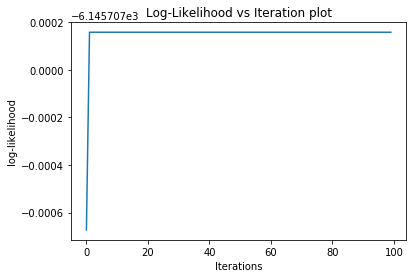

***First Cluster Done***
Initialization Done


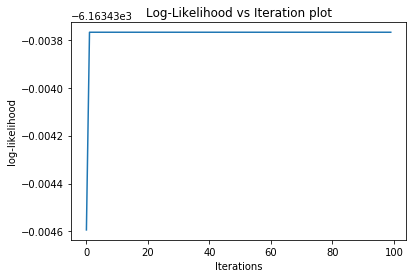

***Second Cluster Done***
******************************


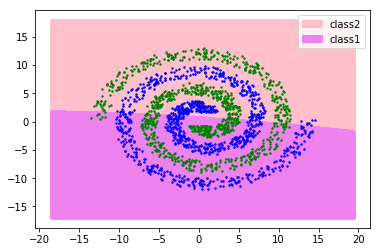

******************************
Confusion Matrix
[[ 189.  137.]
 [ 156.  170.]]
Accuracy:  [ 0.5506135  0.5506135]
Precision:  [ 0.54782609  0.55374593]
Recall:  [ 0.5797546   0.52147239]
F-Measure:  [ 0.5633383  0.5371248]
Mean F-Measure:  0.550231551785
1**done
2**done
Initialization Done


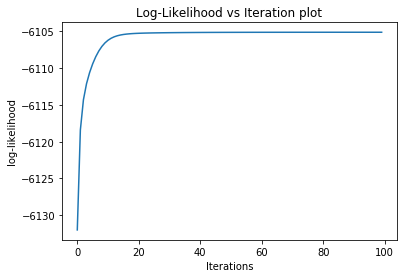

***First Cluster Done***
Initialization Done


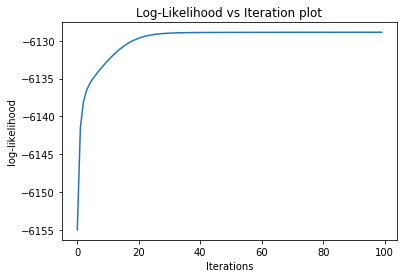

***Second Cluster Done***
******************************


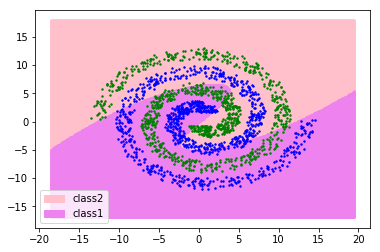

******************************
Confusion Matrix
[[ 191.  135.]
 [ 134.  192.]]
Accuracy:  [ 0.58742331  0.58742331]
Precision:  [ 0.58769231  0.58715596]
Recall:  [ 0.58588957  0.58895706]
F-Measure:  [ 0.58678955  0.58805513]
Mean F-Measure:  0.58742234235
1**done
2**done
Initialization Done


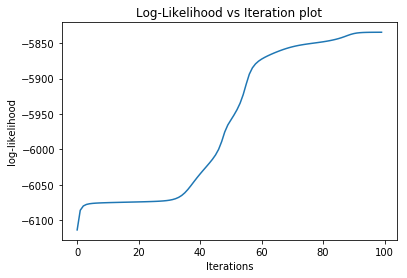

***First Cluster Done***
Initialization Done


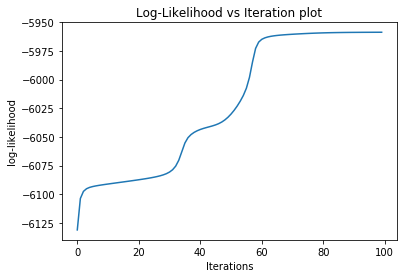

***Second Cluster Done***
******************************


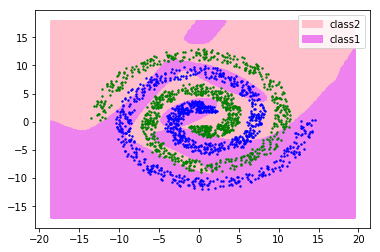

******************************
Confusion Matrix
[[ 264.   62.]
 [  41.  285.]]
Accuracy:  [ 0.84202454  0.84202454]
Precision:  [ 0.86557377  0.82132565]
Recall:  [ 0.80981595  0.87423313]
F-Measure:  [ 0.83676704  0.84695394]
Mean F-Measure:  0.841860487021
1**done
2**done
Initialization Done


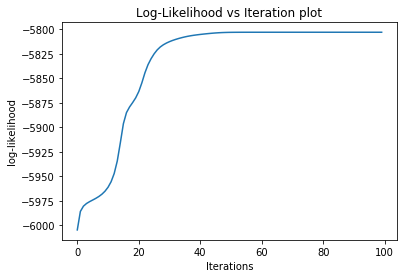

***First Cluster Done***
Initialization Done


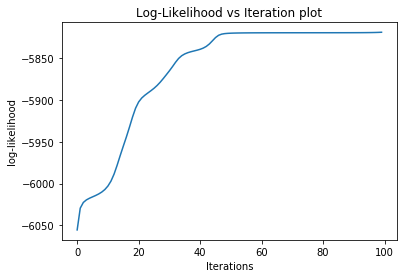

***Second Cluster Done***
******************************


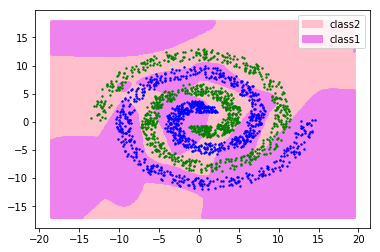

******************************
Confusion Matrix
[[ 280.   46.]
 [  58.  268.]]
Accuracy:  [ 0.8404908  0.8404908]
Precision:  [ 0.82840237  0.85350318]
Recall:  [ 0.85889571  0.82208589]
F-Measure:  [ 0.84337349  0.8375    ]
Mean F-Measure:  0.840436746988
1**done
2**done
Initialization Done


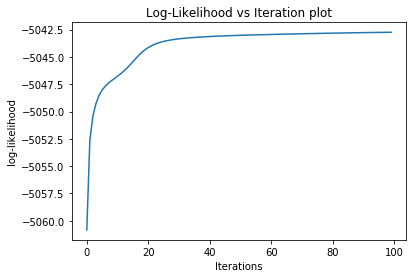

***First Cluster Done***
Initialization Done


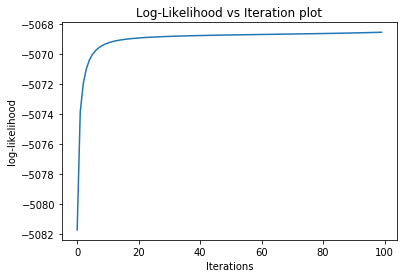

***Second Cluster Done***
******************************


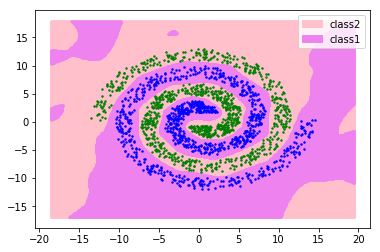

******************************
Confusion Matrix
[[  3.26000000e+02   1.00000000e-10]
 [  1.00000000e-10   3.26000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  1.0
1**done
2**done
Initialization Done


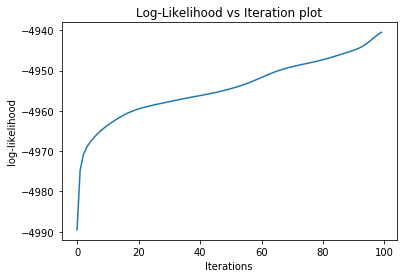

***First Cluster Done***
Initialization Done


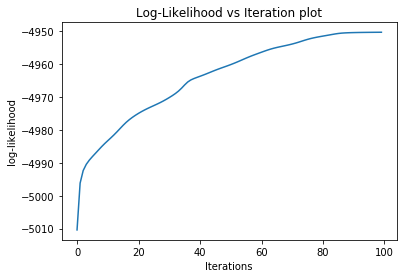

***Second Cluster Done***
******************************


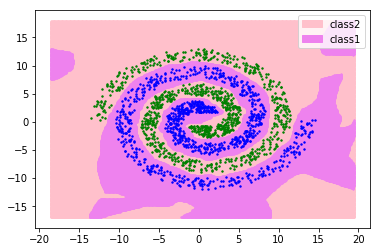

******************************
Confusion Matrix
[[  3.26000000e+02   1.00000000e-10]
 [  1.00000000e-10   3.26000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  1.0
1**done
2**done
Initialization Done


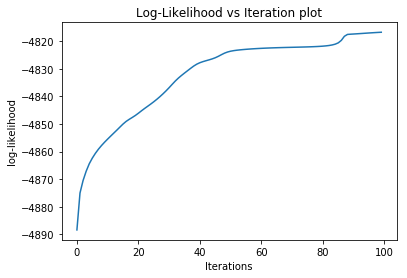

***First Cluster Done***
Initialization Done


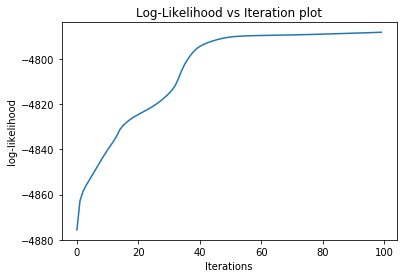

***Second Cluster Done***
******************************


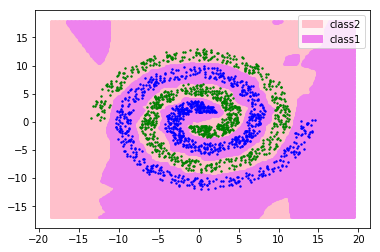

******************************
Confusion Matrix
[[  3.26000000e+02   1.00000000e-10]
 [  1.00000000e-10   3.26000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  1.0


In [113]:
def main():
    train1, train2, test1, test2 = load_data()
    K = [1,2,4,5,16,32,64]
    dims=2
    for k in K:
        mean, cluster1 = kmeans(train1,k,dims)
        print('1**done')
        mean, cluster2 = kmeans(train2,k,dims)
        print('2**done')
        

        mu1, cov1, pi1, gamma = gmm(cluster1, train1, k, dims)
        print('***First Cluster Done***')
        mu2, cov2, pi2, gamma = gmm(cluster2, train2,k, dims)
        print('***Second Cluster Done***')
        
        
        pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, 1, 2,k)

        
    
if(__name__=="__main__"):
    main()
    
    
    